In [29]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [30]:
data = pd.read_csv("train.csv")
#data = pd.read_csv('E:\Third Year\Third Year Second term\Supervised\Ass2\digit-recognizer/train.csv')
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
data = np.array(data)
np.random.shuffle(data)

In [32]:
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets
print(m, n)

42000 785


In [34]:
data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
n_train,m_train = X_train.shape

In [61]:
Y_dev

array([8, 3, 9, 5, 8, 4, 0, 0, 5, 9, 6, 2, 6, 2, 5, 4, 6, 7, 5, 0, 9, 8,
       4, 1, 4, 7, 9, 7, 3, 0, 7, 1, 4, 9, 9, 6, 7, 1, 5, 5, 9, 1, 5, 7,
       3, 2, 6, 0, 8, 1, 3, 1, 2, 0, 1, 7, 9, 1, 2, 0, 2, 3, 8, 1, 9, 5,
       1, 5, 6, 4, 9, 8, 5, 8, 8, 7, 2, 3, 4, 1, 6, 8, 1, 7, 5, 9, 7, 1,
       3, 9, 7, 3, 2, 1, 5, 3, 9, 4, 7, 1, 9, 1, 5, 3, 3, 3, 2, 1, 6, 9,
       7, 1, 0, 1, 8, 3, 1, 8, 4, 8, 8, 8, 6, 8, 2, 0, 9, 8, 0, 3, 4, 4,
       5, 8, 0, 4, 0, 2, 8, 1, 3, 5, 2, 8, 9, 4, 8, 2, 2, 2, 9, 6, 0, 2,
       0, 4, 2, 8, 5, 5, 0, 2, 6, 0, 7, 6, 4, 9, 2, 1, 8, 1, 0, 4, 6, 3,
       1, 7, 4, 3, 2, 8, 7, 7, 0, 8, 6, 7, 5, 3, 8, 7, 5, 9, 0, 7, 8, 1,
       4, 9, 9, 1, 7, 5, 2, 7, 2, 2, 3, 1, 0, 5, 0, 9, 2, 1, 4, 6, 2, 7,
       2, 8, 7, 8, 8, 2, 3, 2, 8, 6, 2, 9, 1, 1, 7, 5, 2, 2, 6, 6, 8, 3,
       4, 3, 5, 2, 7, 1, 8, 4, 0, 8, 6, 2, 0, 6, 0, 6, 8, 9, 0, 8, 9, 4,
       7, 1, 7, 5, 9, 0, 1, 7, 6, 7, 4, 4, 6, 0, 1, 2, 1, 7, 4, 1, 1, 0,
       9, 4, 9, 6, 1, 8, 5, 3, 8, 5, 2, 2, 0, 8, 9,

In [36]:
Y_train

array([0, 9, 0, ..., 5, 3, 6], dtype=int64)

In [38]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [39]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[3 1 1 ... 1 1 1] [0 9 0 ... 5 3 6]
0.09578048780487805
Iteration:  10
[3 8 0 ... 8 3 8] [0 9 0 ... 5 3 6]
0.1289268292682927
Iteration:  20
[7 1 0 ... 0 3 3] [0 9 0 ... 5 3 6]
0.1974390243902439
Iteration:  30
[7 1 0 ... 0 3 3] [0 9 0 ... 5 3 6]
0.2578048780487805
Iteration:  40
[7 8 0 ... 0 3 3] [0 9 0 ... 5 3 6]
0.30917073170731707
Iteration:  50
[7 8 0 ... 0 3 3] [0 9 0 ... 5 3 6]
0.3574634146341463
Iteration:  60
[7 8 0 ... 0 3 3] [0 9 0 ... 5 3 6]
0.41168292682926827
Iteration:  70
[7 8 0 ... 0 3 4] [0 9 0 ... 5 3 6]
0.4634146341463415
Iteration:  80
[0 8 0 ... 0 3 4] [0 9 0 ... 5 3 6]
0.5003658536585366
Iteration:  90
[0 8 0 ... 0 3 8] [0 9 0 ... 5 3 6]
0.5281219512195122
Iteration:  100
[0 8 0 ... 0 3 8] [0 9 0 ... 5 3 6]
0.5507560975609757
Iteration:  110
[0 8 0 ... 0 3 8] [0 9 0 ... 5 3 6]
0.5699512195121951
Iteration:  120
[0 8 0 ... 0 3 8] [0 9 0 ... 5 3 6]
0.5875121951219512
Iteration:  130
[0 8 0 ... 0 3 8] [0 9 0 ... 5 3 6]
0.6041219512195122
Iteration:  14

In [40]:
def make_predictions(X, W1, b1, W2, b2):
    Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [0]
Label:  0


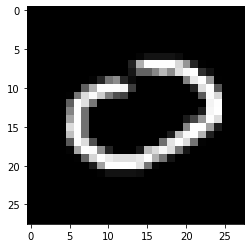

Prediction:  [4]
Label:  9


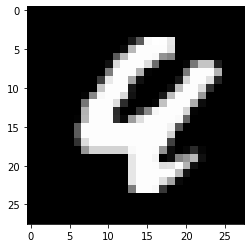

Prediction:  [0]
Label:  0


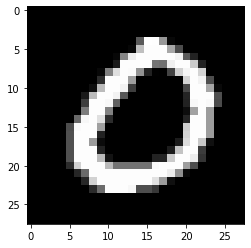

Prediction:  [3]
Label:  3


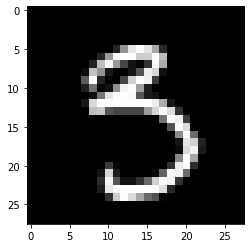

In [41]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [56]:
y_pred = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(y_pred, Y_dev)

[8 3 9 5 8 4 0 0 8 9 6 2 6 2 5 4 6 7 5 0 9 8 4 1 4 7 9 7 3 0 7 1 4 9 9 6 7
 1 5 3 4 1 8 4 5 2 6 0 8 1 3 1 2 0 1 7 9 1 4 0 2 3 5 1 9 5 1 0 6 4 9 8 5 1
 8 7 2 3 4 1 6 8 1 7 0 9 7 1 7 9 7 3 1 1 0 3 9 4 7 1 9 1 5 3 3 3 2 7 6 9 7
 1 0 1 2 3 1 8 4 8 8 8 6 8 2 0 9 8 0 3 4 4 5 8 0 4 5 2 8 1 3 8 2 8 9 4 8 2
 2 2 9 6 5 2 5 9 2 8 5 5 0 2 6 0 9 6 4 9 2 1 8 1 0 8 6 3 1 7 4 3 2 8 7 7 0
 8 4 7 4 3 8 7 5 9 0 7 9 1 4 7 9 2 7 8 2 7 2 2 3 1 0 5 0 9 8 1 9 6 6 7 6 3
 7 8 8 1 3 2 8 6 2 9 1 1 7 0 3 2 6 6 8 3 4 3 5 2 7 1 8 4 0 8 6 2 0 6 0 6 8
 4 0 5 9 4 7 1 7 5 7 0 1 7 6 7 4 4 6 0 1 1 1 5 4 1 1 0 9 4 5 6 1 8 5 2 8 0
 2 2 0 8 9 2 7 1 6 3 7 5 8 9 8 3 8 5 8 4 4 7 3 6 3 0 4 6 4 1 7 3 4 1 0 2 6
 3 3 3 8 3 9 4 8 6 9 6 7 6 9 6 0 1 0 3 3 5 0 5 9 0 7 8 1 1 1 7 7 5 9 7 3 8
 0 1 6 9 7 1 9 9 1 2 4 6 7 6 1 4 5 7 8 6 8 9 7 2 2 0 3 1 3 1 2 2 2 0 3 7 6
 3 2 0 9 2 7 8 4 9 6 1 9 2 8 3 7 8 9 9 9 6 0 8 8 7 7 5 7 8 3 4 3 5 1 1 2 3
 4 3 7 4 9 3 6 2 3 4 2 8 4 7 8 0 2 4 9 0 1 7 6 9 4 4 0 9 8 2 6 4 1 1 5 2 4
 6 1 6 0 6 6 4 3 9 9 0 5 

0.809